In [2]:
# importando bibliotecas 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot

In [3]:
# importando dados de maré utilizados e criando dataframes

CAPSALV=pd.read_csv("/Users/thiagozamith/Desktop/teste3")
#cadim=read_csv(cadim,parse_dates=False)
CAPSALV


,OBSERVADA CAPSALV
0,119.5
1,96.3
2,82.7
3,81.0
4,91.3
...,...
474,44.1
475,50.0
476,75.5
477,112.6


In [4]:
prevista=pd.read_csv("/Users/thiagozamith/Desktop/teste5")
#cadim=read_csv(cadim,parse_dates=False)
prevista

,Prevista-NM
0,-29.7
1,-46.7
2,-52.7
3,-45.7
4,-26.7
...,...
474,-76.7
475,-72.7
476,-49.7
477,-13.7


In [5]:
# Implementando Filtro Godam para comparação do Nivel Medio Diario (NMD) - Eliminando M2
media_movel01=CAPSALV.rolling(window=25,center=True)
media_movel25h=media_movel01.mean()
# Implementando Filtro Godam para comparação do Nivel Medio Diario (NMD) - Eliminando S2
media_movel02=media_movel25h.rolling(window=24,center=True)
media_movel24h=media_movel02.mean()
# Implementando Filtro Godam para comparação do Nivel Medio Diario (NMD) - Eliminando Residuos M2/S2
media_movel03=media_movel24h.rolling(window=25,center=True)
media_movel25h_res=media_movel03.mean()


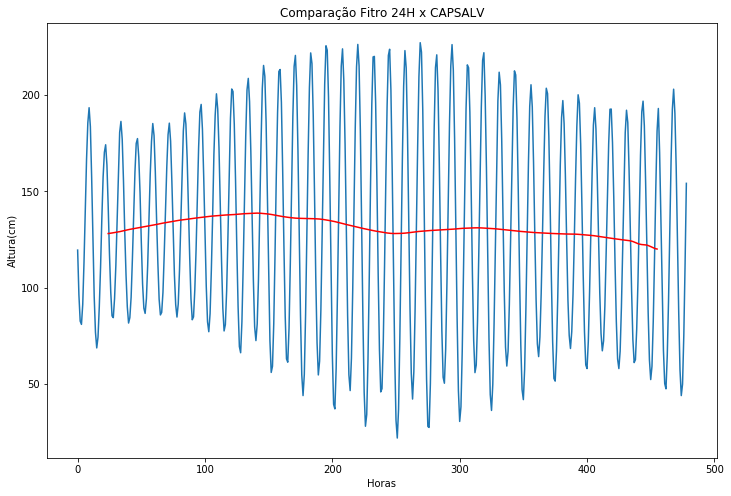

In [6]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(CAPSALV.index,CAPSALV["OBSERVADA CAPSALV"])
ax.plot(media_movel24h.index,media_movel24h["OBSERVADA CAPSALV"],color="red")
ax.set_title("Comparação Fitro 24H x CAPSALV")
ax.set_xlabel("Horas")
ax.set_ylabel("Altura(cm)")


plt.show()

In [7]:
FILTRADA=CAPSALV["OBSERVADA CAPSALV"] - media_movel24h["OBSERVADA CAPSALV"]
FILTRADA[445]

61.64116666666659

In [8]:
FILTRADA.to_csv("/Users/thiagozamith/Desktop/FILTRADA.csv",index = False, header=True)

In [9]:
filtrada_sem_nan=pd.read_csv("/Users/thiagozamith/Desktop/teste10")

filtrada_sem_nan

,FILTRADA
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
474,0.0
475,0.0
476,0.0
477,0.0


Text(0, 0.5, 'Altura(cm)')

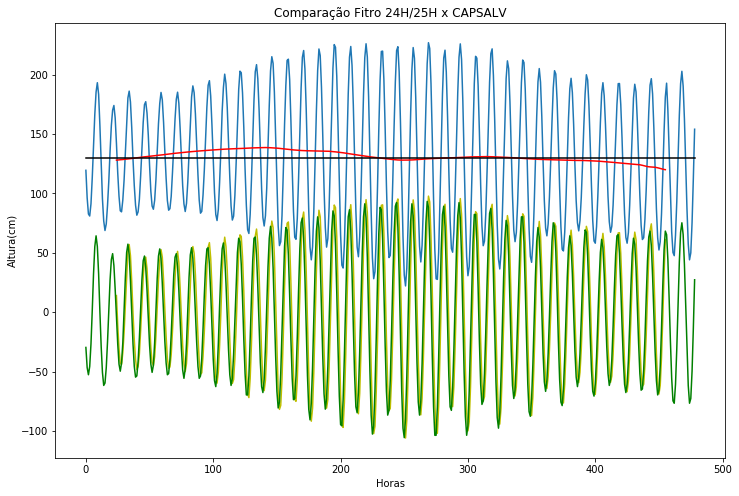

In [10]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(CAPSALV.index,CAPSALV["OBSERVADA CAPSALV"])
ax.plot(media_movel24h.index,media_movel24h["OBSERVADA CAPSALV"],color="red")
ax.plot(FILTRADA.index,FILTRADA,color="y")
ax.plot(prevista.index,prevista,color="g")
ax.plot(FILTRADA.index,479*[130.1],label="NM",color="black")
ax.set_title("Comparação Fitro 24H/25H x CAPSALV")
ax.set_xlabel("Horas")
ax.set_ylabel("Altura(cm)")

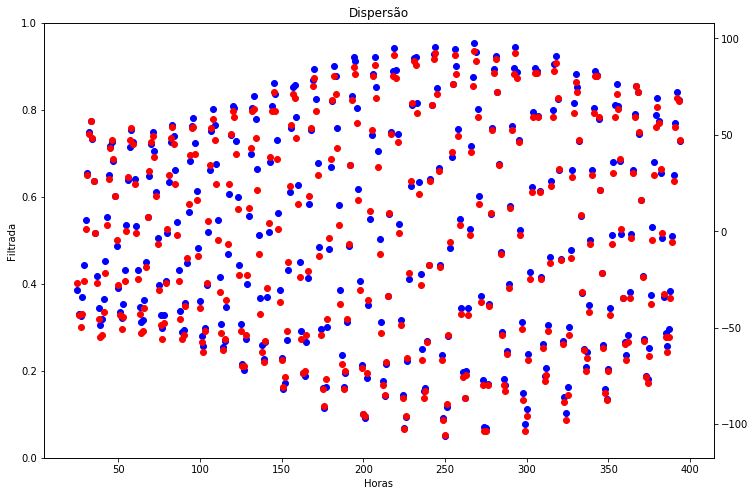

In [18]:
colors=["r","b"]
fig,ax=plt.subplots(figsize=(12,8))
x=filtrada_sem_nan.iloc[25:395]
y=prevista.iloc[25:395]
ax2 = ax.twinx()
plt.scatter(x.index,x,alpha=1,c="b")
ax2.scatter(y.index,y,alpha=1,c="r")
ax.set_title("Dispersão")
ax.set_xlabel("Horas")
ax.set_ylabel("Filtrada")
plt.show()

In [12]:
prevista.to_csv("/Users/thiagozamith/Desktop/prevista.csv",index = False, header=True)

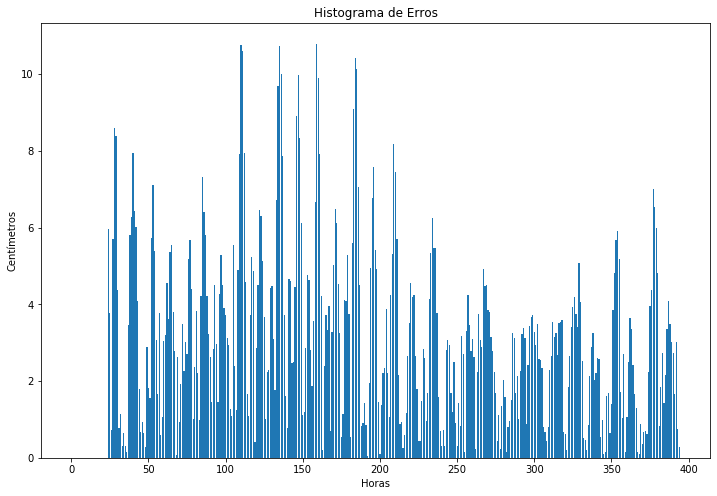

In [23]:
ERROS_abs = abs(filtrada_sem_nan["FILTRADA"] - prevista["Prevista-NM"])
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(10)
ax.set_title("Histograma de Erros")
ax.set_xlabel("Horas")
ax.set_ylabel("Centímetros")
ax.bar(ERROS_abs.index[24:395],ERROS_abs.iloc[24:395])
plt.show()

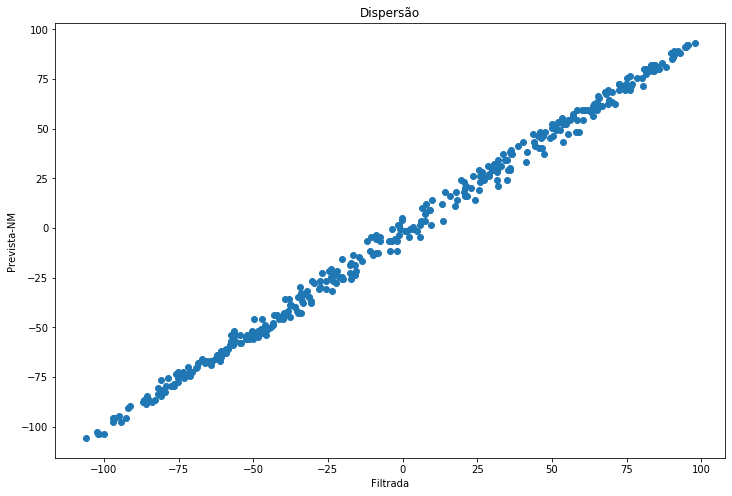

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(filtrada_sem_nan.iloc[24:395],prevista.iloc[24:395])
ax.set_title("Dispersão")
ax.set_xlabel("Filtrada")
ax.set_ylabel("Prevista-NM")
plt.show()

In [ ]:
filtrada_sem_nan["prev"]=prevista["Prevista-NM"]
filtrada_sem_nan.plot()

In [29]:
import statsmodels.api as sm # lib estatistica
# é necessário adicionar uma constante a matriz X
x3=filtrada_sem_nan.iloc[24:395]
y3=prevista.iloc[24:395]
x_sm = sm.add_constant(x3)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y3, x3).fit()
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Prevista-NM   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          7.305e+04
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        08:20:29   Log-Likelihood:                         -1032.8
No. Observations:                 371   AIC:                                      2068.
Df Residuals:                     370   BIC:                                      2071.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FILTRADA       0.9911      0.004    270.283      0.000       0.984       0.998
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   0.252
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.421
Skew:                          -0.046   Prob(JB):                        0.810
Kurtosis:                       2.862   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""